# 데이콘 Basic 칼로리 소모량 예측 AI 경진대회
https://dacon.io/competitions/official/236097/overview/description

**Dataset Info.**

**train.csv [파일]**
```
7500개의 데이터
ID : 샘플 별 고유 id
Exercise_Duration  : 운동 시간(분)
Body_Temperature(F) : 체온
BPM : 심박수
Height(Feet) : 키(피트)
Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
Weight(lb) : 몸무게(파운드)
Weight_Status : 체중 상태
Gender : 성별
Age : 나이
Calories_Burned : 칼로리 소모량(목표 예측값)
```

**test.csv [파일]**
```
7500개의 데이터
ID : 샘플 별 고유 id
Exercise_Duration  : 운동 시간(분)
Body_Temperature(F) : 체온
BPM : 심박수
Height(Feet) : 키(피트)
Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
Weight(lb) : 몸무게(파운드)
Weight_Status : 체중 상태
Gender : 성별
Age : 나이
```

**sample_submission.csv [제출양식]**
```
ID : 샘플 별 고유 id
Calories_Burned : 칼로리 소모량(목표 예측값)
```

In [3]:
# 목차 표시
# ! jupyter contrib nbextension install --user
# ! jupyter nbextensions_configurator enable --user


In [6]:
!unzip 'open (2).zip'

Archive:  open (2).zip
   creating: open/
  inflating: open/sample_submission.csv  
  inflating: open/test.csv           
  inflating: open/train.csv          


## 불러오기

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# !pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.9 MB 17.2 MB/s            


In [120]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [19]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')
submission = pd.read_csv('open/sample_submission.csv')

train.shape, test.shape, submission.shape

((7500, 11), (7500, 10), (7500, 2))

In [90]:
submission.head()

,ID,Calories_Burned
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [20]:
train.head(2)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [23]:
train.isnull().sum().sum()

0

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   float64
 7   Age                       7500 non-null   int64  
 8   Calories_Burned           7500 non-null   float64
 9   Temperature(C)            7500 non-null   float64
 10  Height(cm)                7500 non-null   float64
 11  Weight(kg)                7500 non-null   float64
 12  Ages                      7500 non-null   int64  
 13  Gender_F                  7500 non-null   uint8  
 14  Gender_M

In [62]:
train['Age'].value_counts()

20    254
22    247
21    238
25    230
26    217
24    210
28    206
29    203
27    202
32    186
23    186
31    175
35    173
33    168
30    166
38    163
34    150
37    148
39    147
36    141
42    140
44    123
43    122
45    119
40    118
50    117
41    115
46    113
47    113
48    113
52    110
49    105
53    105
51    103
55     99
58     98
59     97
61     97
62     94
54     92
56     90
63     90
64     86
57     82
73     80
65     79
74     77
71     77
67     77
66     76
68     76
76     75
70     75
78     71
72     71
60     69
69     64
77     64
79     60
75     58
Name: Age, dtype: int64

## 데이터 단위 변경

- 여자, 남자 따로 모델 돌리기 -> get_dummies 
- 화씨 -> 섭씨
- Height =  5.0Feet * 30.48 + 9.0Inches * 2.54 = 175.26cm 
- weight = 파운드 -> kg
- 연령대 : 20, 30, 40, 50, 60, 70대

In [93]:
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [100]:
# OrdinalEncoder
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Normal Weight', 'Overweight','Obese']],
                   handle_unknown='use_encoded_value',
                   unknown_value=-1)

train['Weight_Status'] = oe.fit_transform(np.array(train['Weight_Status']).reshape(-1,1))
test['Weight_Status'] = oe.transform(np.array(test['Weight_Status']).reshape(-1,1))

ValueError: could not convert string to float: 'Normal Weight'

In [ ]:
train = train.drop('ID',axis=1)
test = test.drop('ID',axis=1)

In [101]:
train = pd.get_dummies(train).copy()
test = pd.get_dummies(test).copy()

In [102]:
# 화씨를 섭씨로 변환 
train['Temperature(C)'] = round(((train['Body_Temperature(F)'] - 32) * 5/9),2)


# Feet + inches를 cm로 변환 
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)'] * 2.54


# 파운드를 kg으로 변환 
train['Weight(kg)'] = round((train['Weight(lb)'] / 2.2046),2)


# 연령대 함수 생성

def ages(x):
    y = x//10
    return y * 10

train['Ages'] = train['Age'].map(ages)
train.head(1)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Age,Calories_Burned,Temperature(C),Height(cm),Weight(kg),Ages,Gender_F,Gender_M
0,26.0,105.6,107.0,5.0,9.0,154.3,0.0,45,166.0,40.89,175.26,69.99,40,1,0


In [103]:
# 화씨를 섭씨로 변환 
test['Temperature(C)'] = round(((test['Body_Temperature(F)'] - 32) * 5/9),2)


# Feet + inches를 cm로 변환 
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)'] * 2.54


# 파운드를 kg으로 변환 
test['Weight(kg)'] = round((test['Weight(lb)'] / 2.2046),2)


# 연령대 함수 생성

def ages(x):
    y = x//10
    return y * 10

test['Ages'] = test['Age'].map(ages)
test.head(1)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Age,Temperature(C),Height(cm),Weight(kg),Ages,Gender_F,Gender_M
0,26.0,105.1,107.0,5.0,1.0,114.6,0.0,45,40.61,154.94,51.98,40,1,0


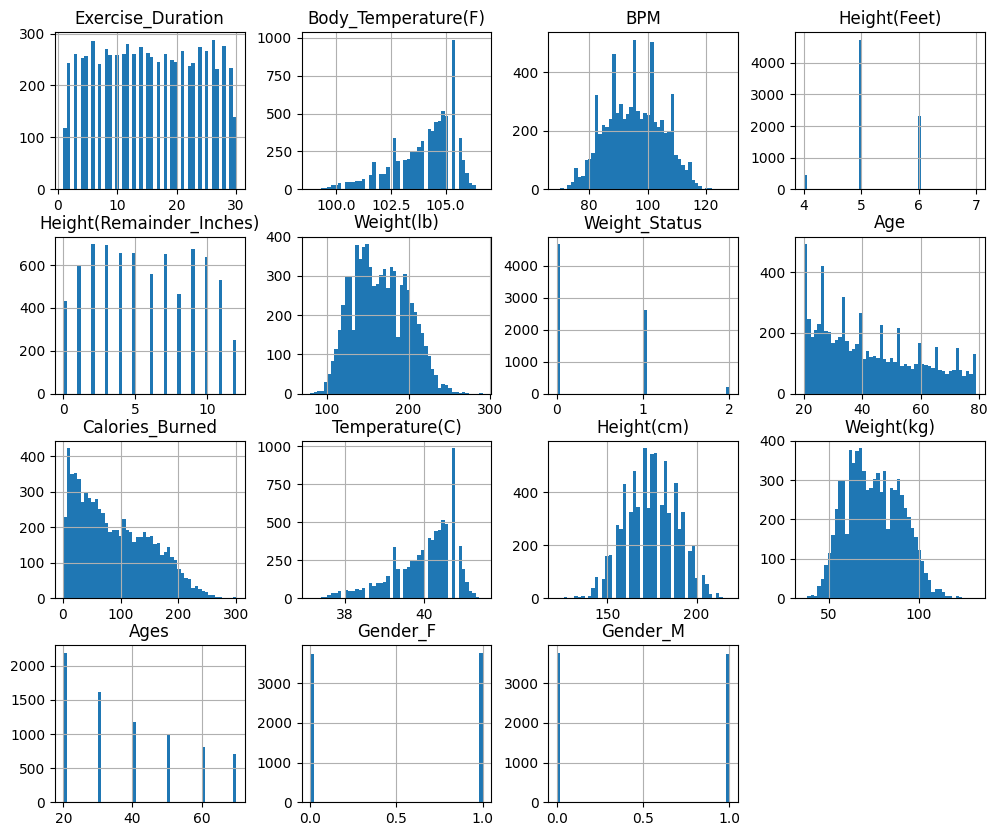

In [104]:
train.hist(bins=50, figsize=(12,10));

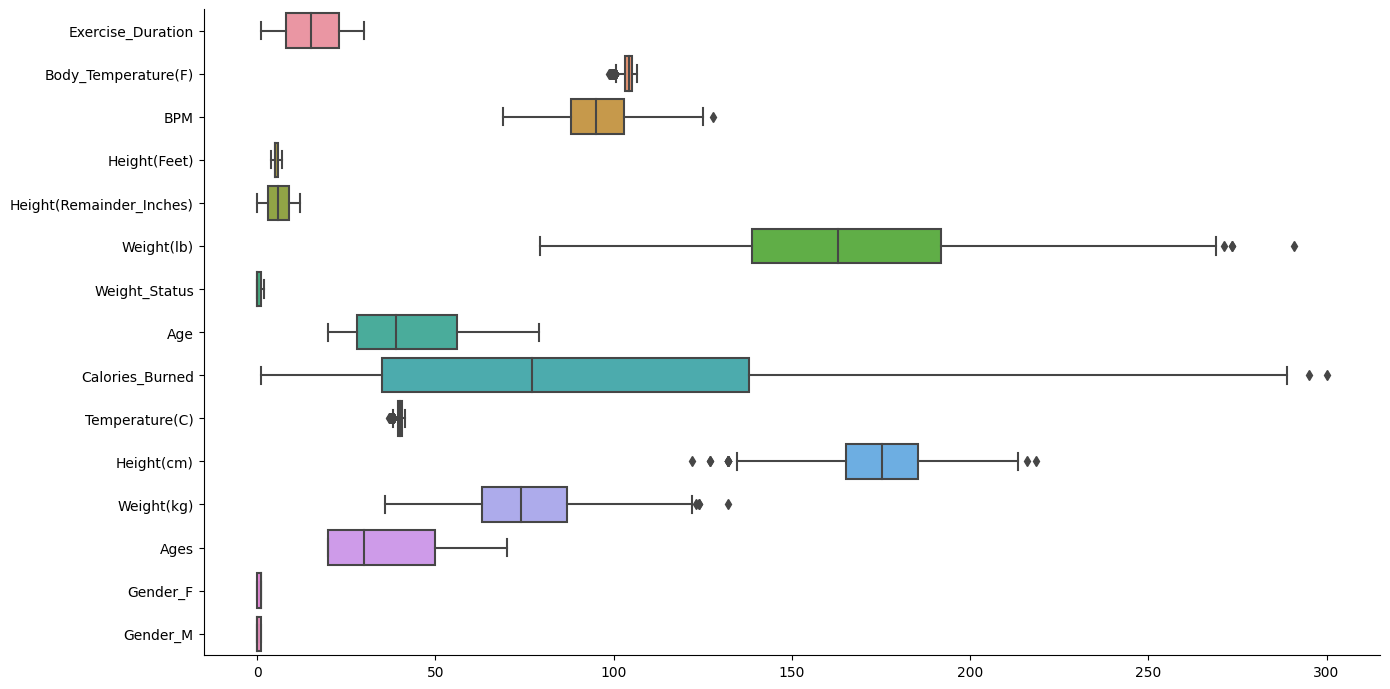

In [105]:
# sns.boxplot(data=train, orient ='h')

g = sns.catplot(data=train, kind="box",
                height=7, aspect=2, orient ='h');

<AxesSubplot:xlabel='Temperature(C)', ylabel='count'>

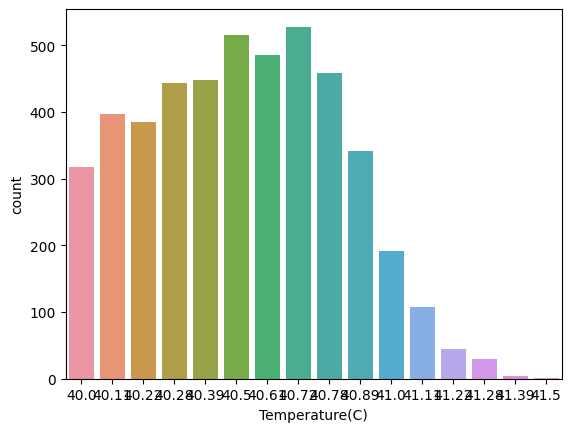

In [106]:
dt = train[train['Temperature(C)']>=40]
sns.countplot(x='Temperature(C)', data=dt)

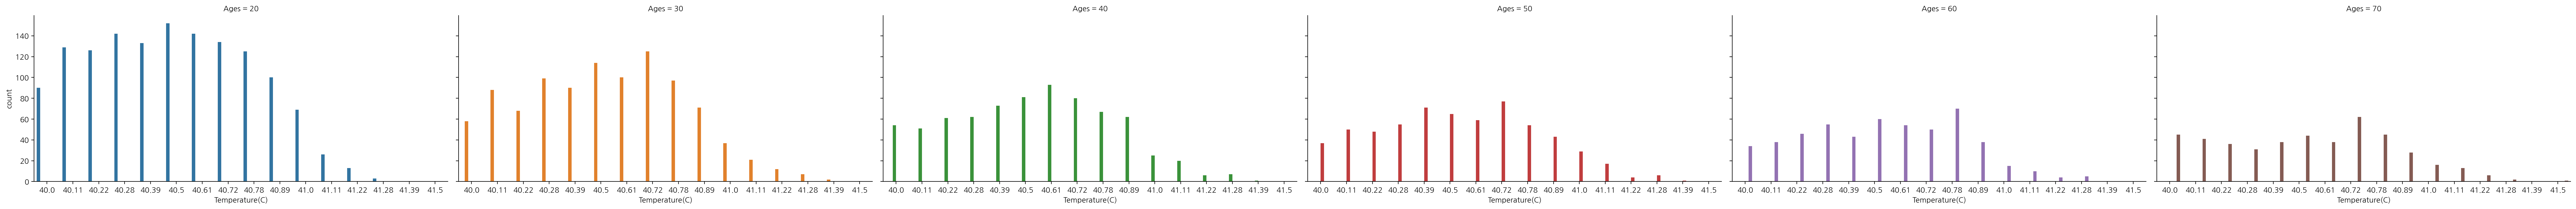

In [125]:
g = sns.catplot(x="Temperature(C)", hue="Ages", col="Ages", 
                data=dt, kind="count",
                height=4, aspect=2);

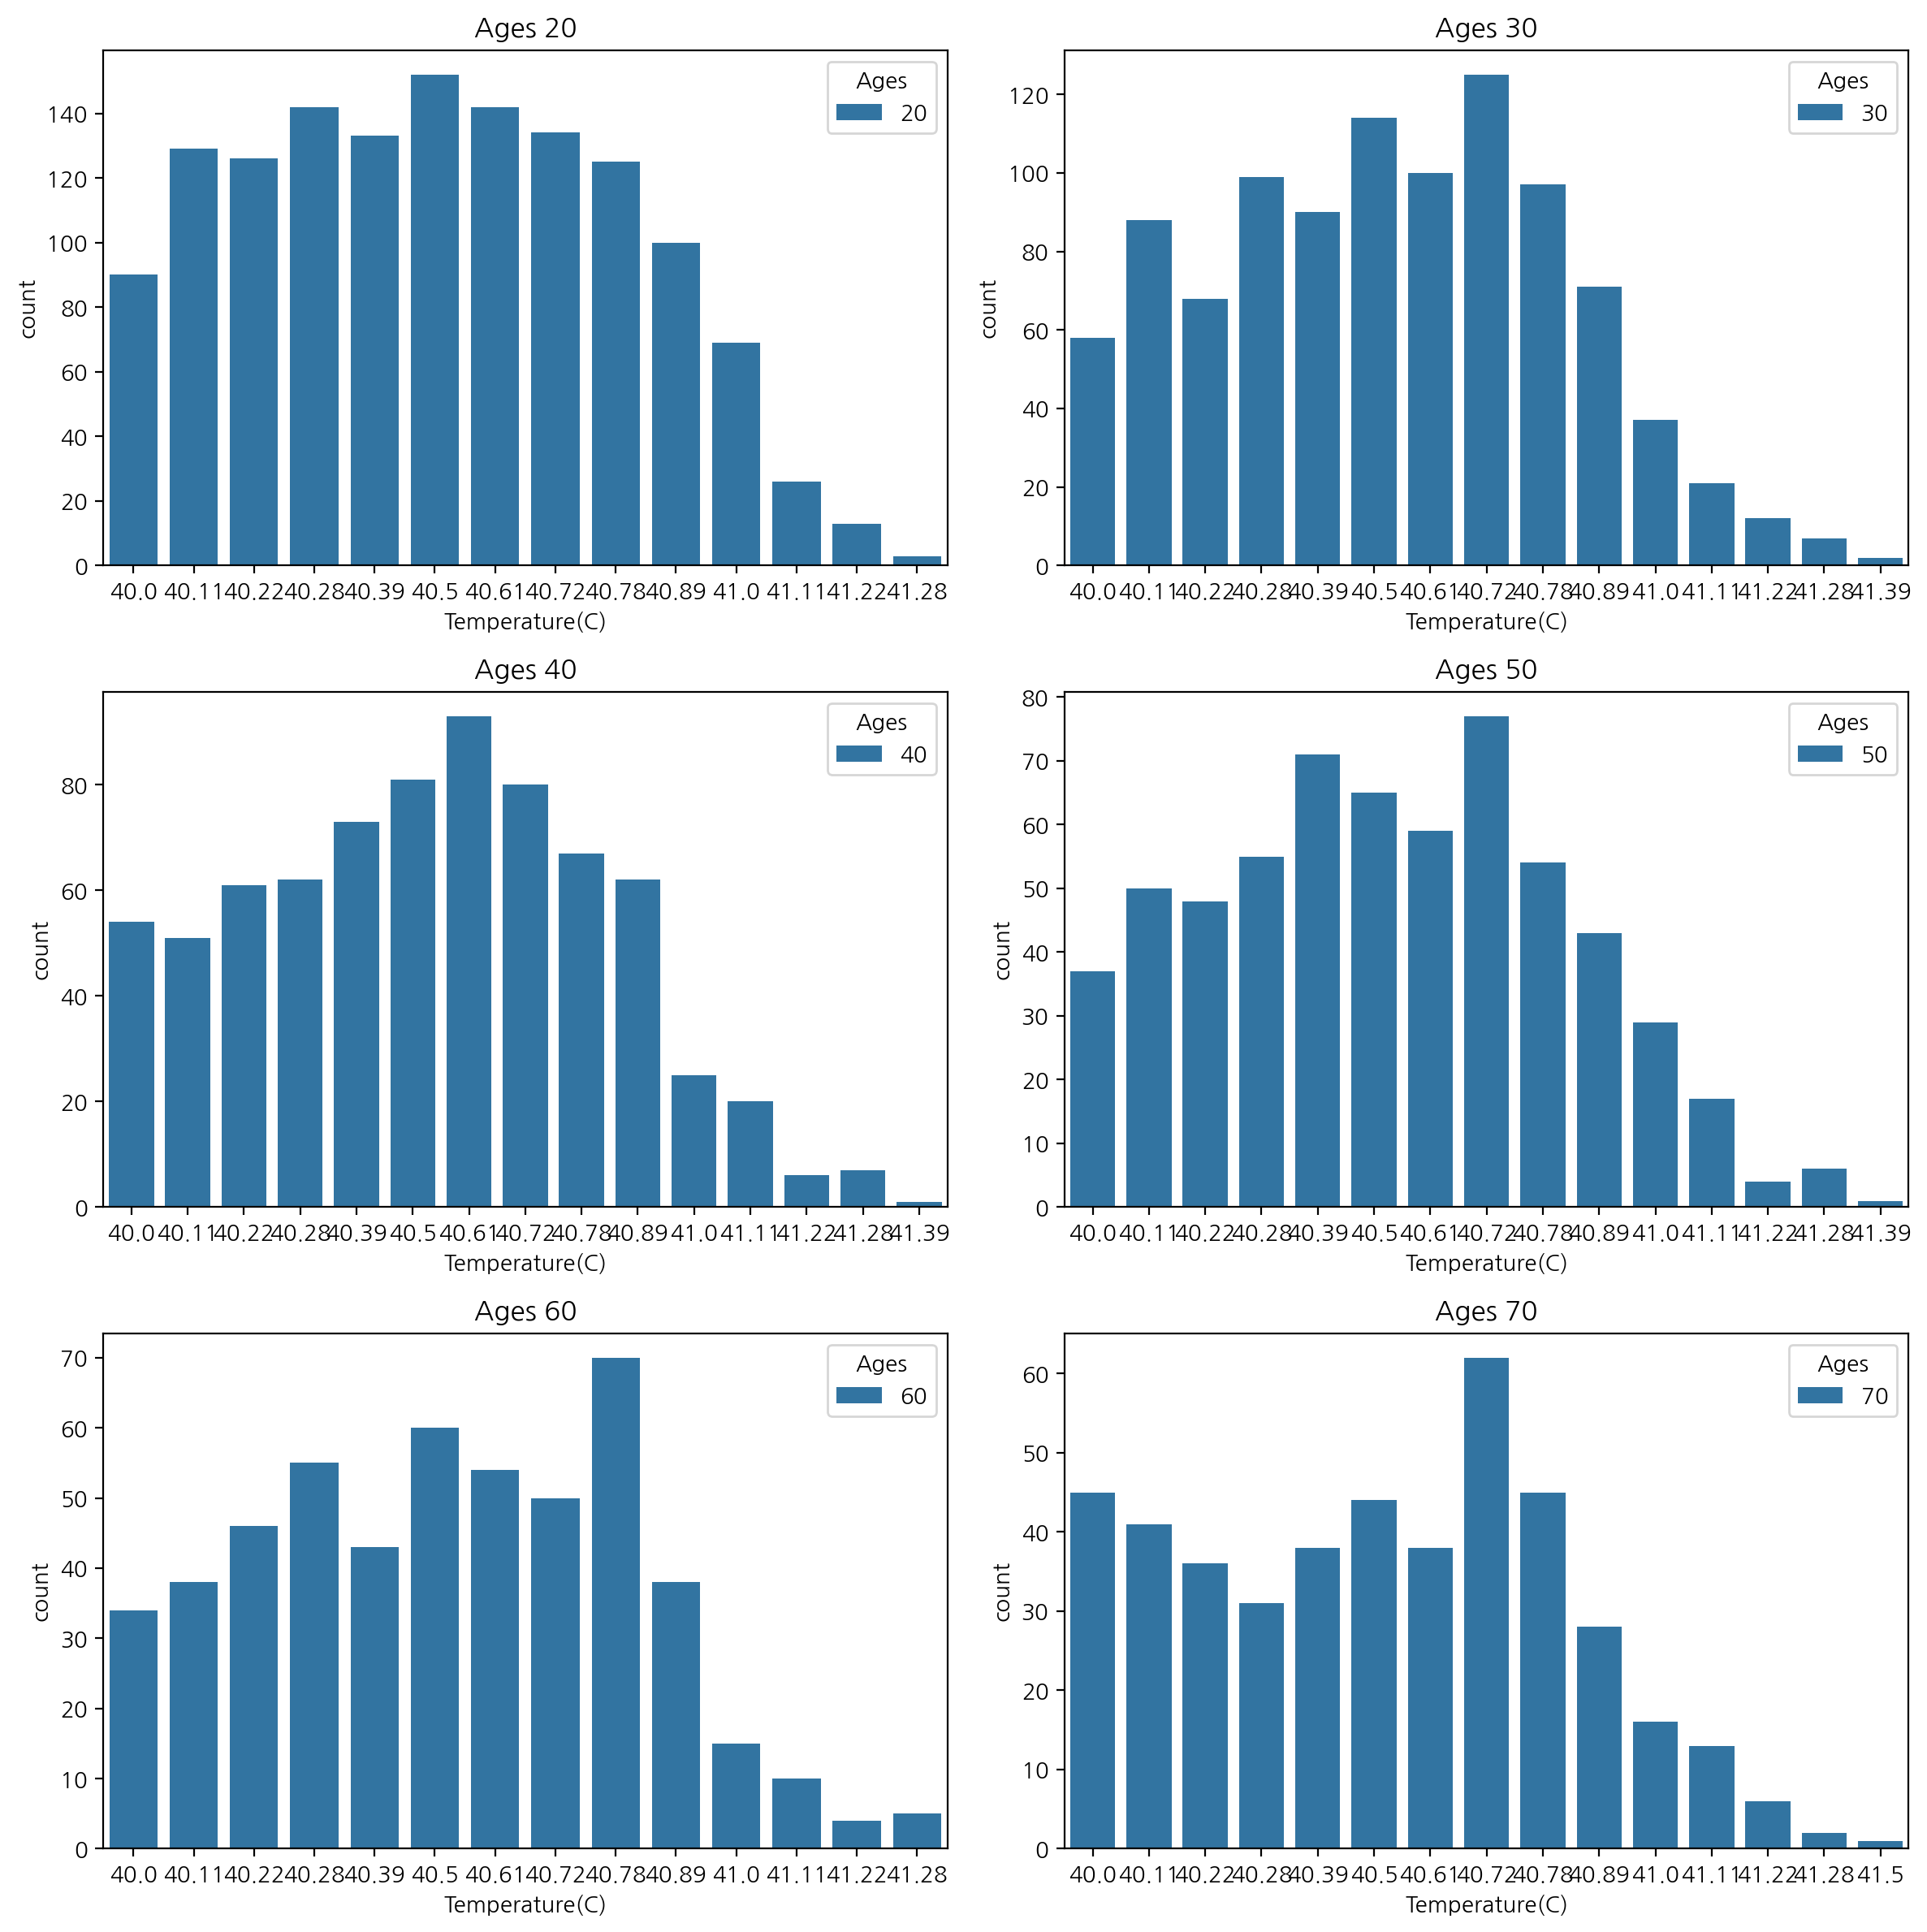

In [126]:
# 3행 2열의 서브플롯을 만든다.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# 'Ages' 열의 값을 가져온다.
ages = sorted(dt['Ages'].unique())

# 각각의 서브플롯에서 카테고리 플롯을 그린다.
for i, ax in enumerate(axes.flatten()):
    if i < len(ages):
        age = ages[i]
        sns.countplot(x='Temperature(C)', hue='Ages', data=dt[dt['Ages'] == age], ax=ax)
        ax.set_title(f"Ages {age}")
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, '상관관계')

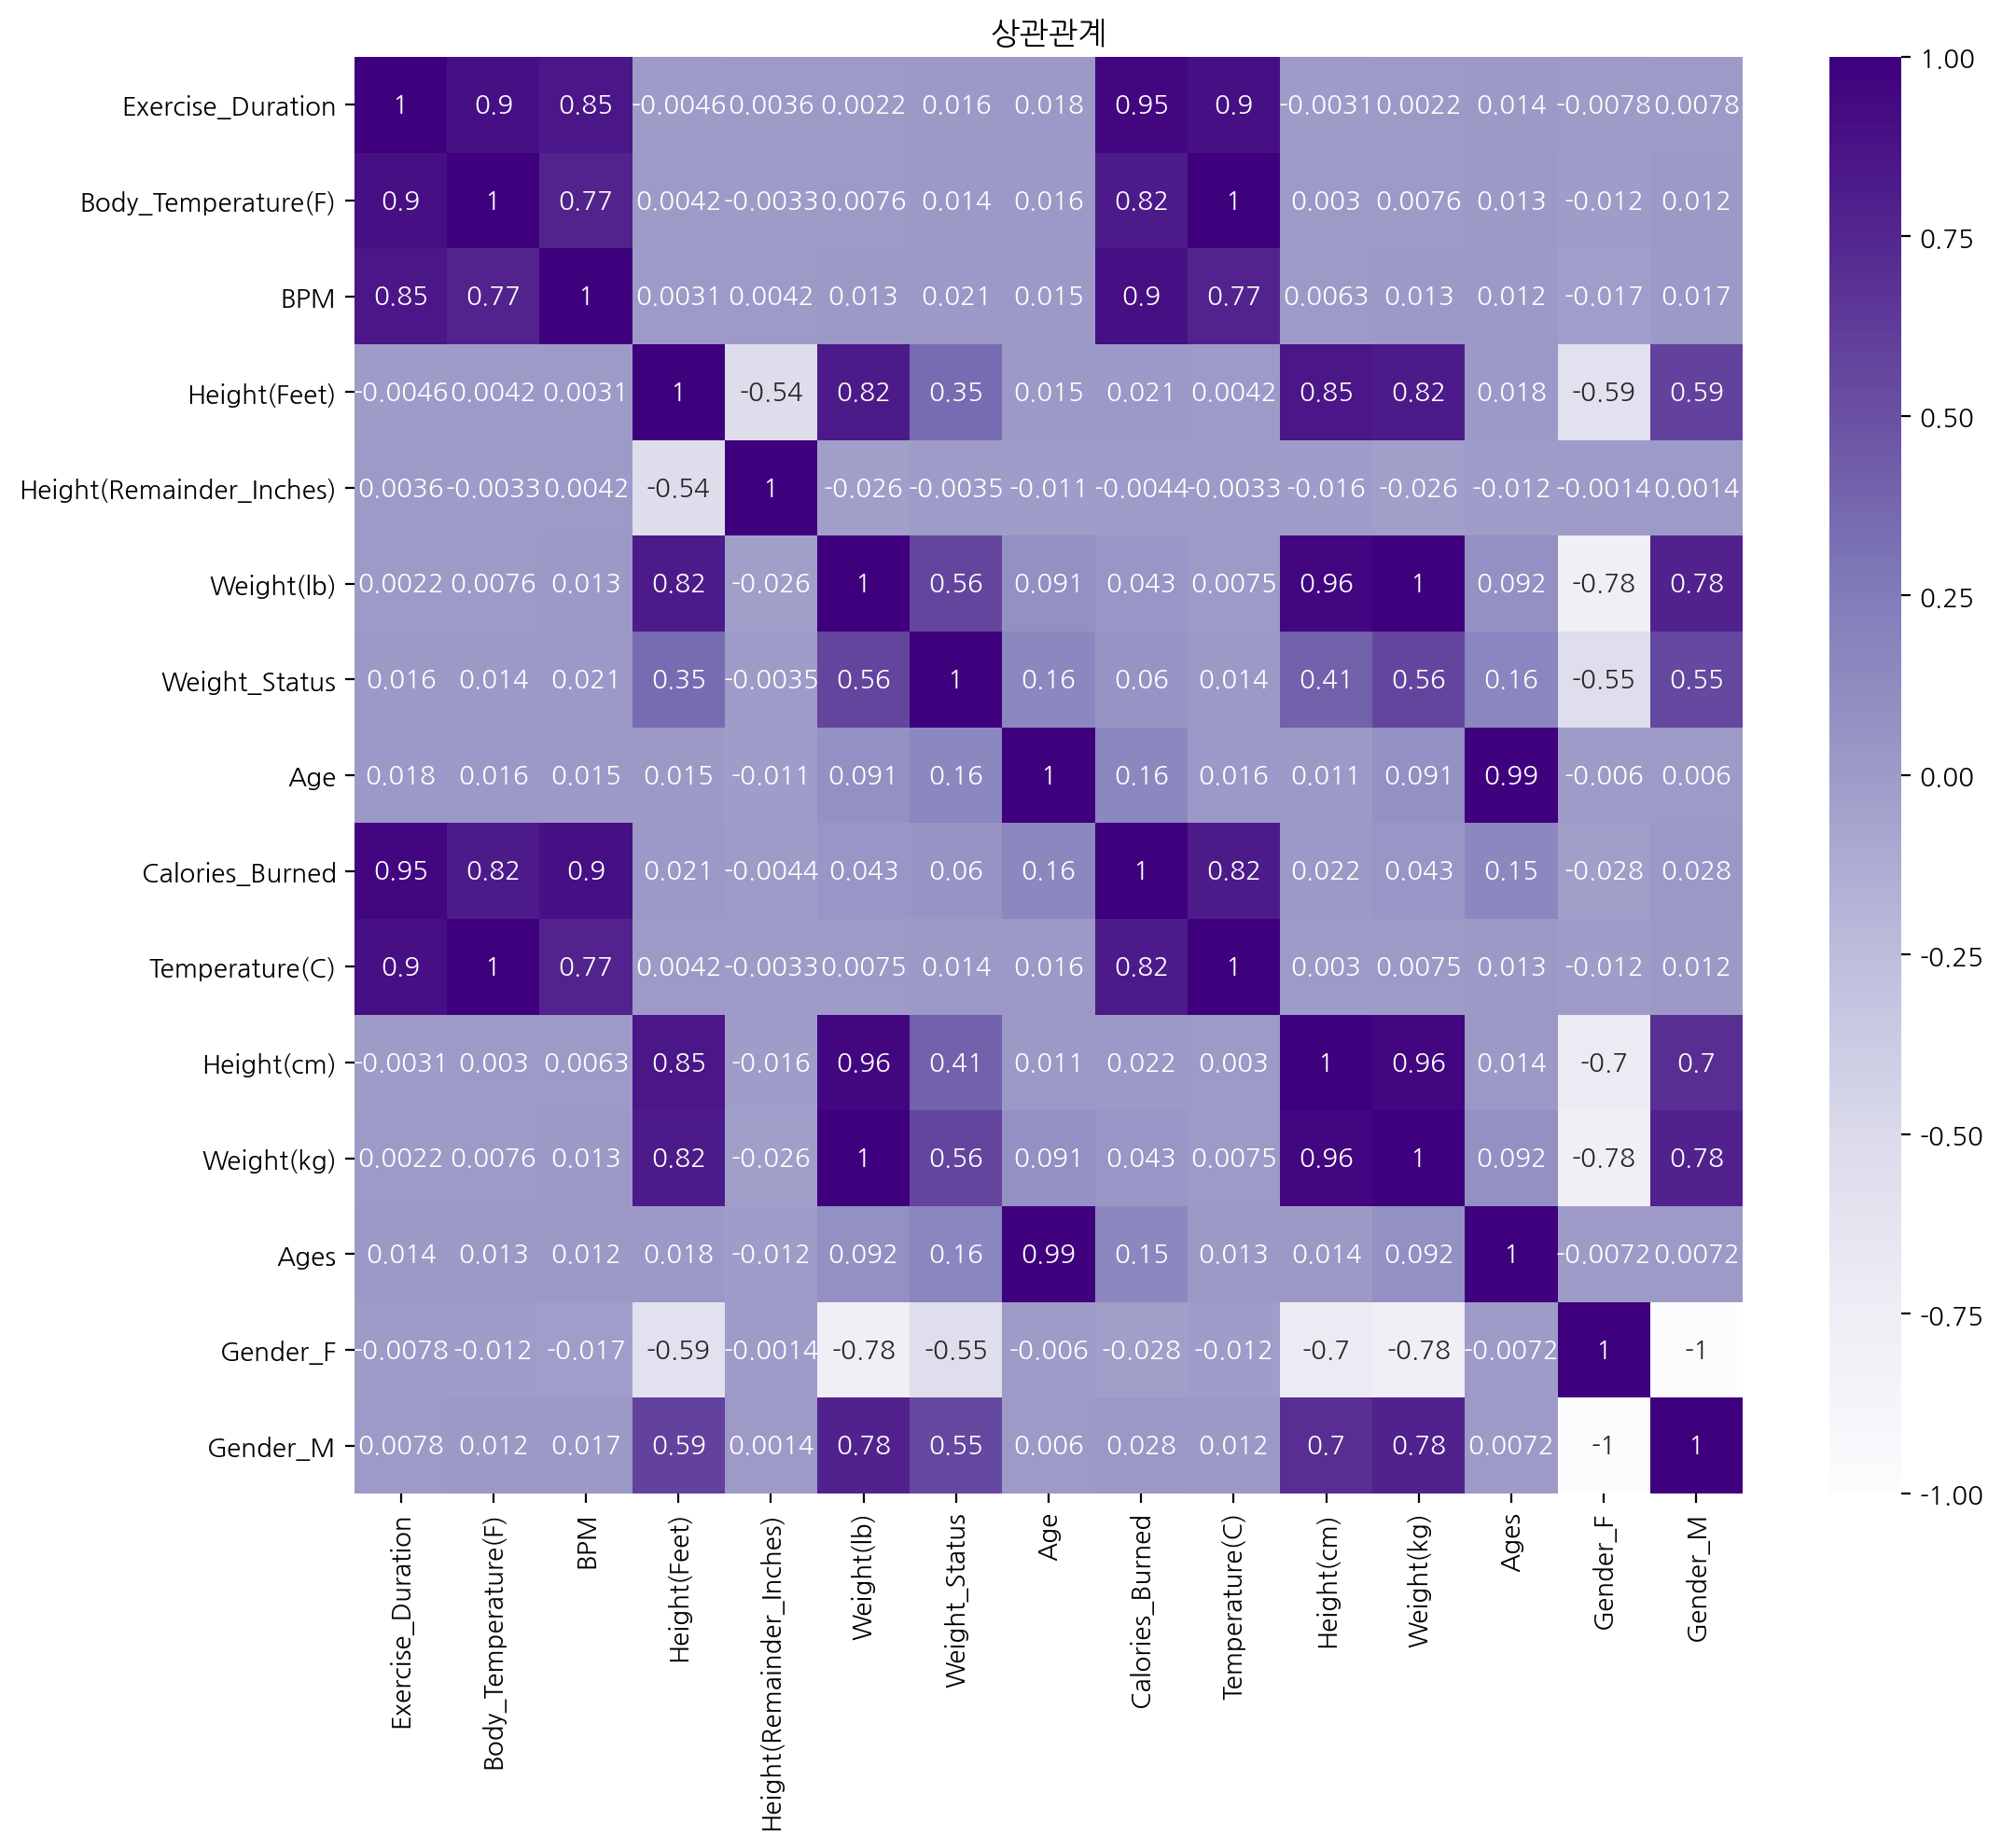

In [121]:
corr = train.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('상관관계')

In [91]:
train.corr()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned,Temperature(C),Height(cm),Weight(kg),Ages
Exercise_Duration,1.000000,0.904314,0.853489,-0.004566,0.003649,0.002236,0.017734,0.954783,0.904355,-0.003146,0.002233,0.014035
Body_Temperature(F),0.904314,1.000000,0.770707,0.004248,-0.003311,0.007554,0.016474,0.824379,0.999998,0.002979,0.007552,0.013284
BPM,0.853489,0.770707,1.000000,0.003110,0.004244,0.012562,0.014702,0.899900,0.770752,0.006319,0.012561,0.011539
Height(Feet),-0.004566,0.004248,0.003110,1.000000,-0.536675,0.821749,0.015356,0.020780,0.004247,0.852031,0.821756,0.017557
Height(Remainder_Inches),0.003649,-0.003311,0.004244,-0.536675,1.000000,-0.025702,-0.011303,-0.004381,-0.003308,-0.015548,-0.025718,-0.011722
Weight(lb),0.002236,0.007554,0.012562,0.821749,-0.025702,1.000000,0.090536,0.042568,0.007548,0.957816,1.000000,0.091909
Age,0.017734,0.016474,0.014702,0.015356,-0.011303,0.090536,1.000000,0.159624,0.016454,0.011184,0.090533,0.985469
Calories_Burned,0.954783,0.824379,0.899900,0.020780,-0.004381,0.042568,0.159624,1.000000,0.824418,0.021906,0.042566,0.154418
Temperature(C),0.904355,0.999998,0.770752,0.004247,-0.003308,0.007548,0.016454,0.824418,1.000000,0.002980,0.007546,0.013260
Height(cm),-0.003146,0.002979,0.006319,0.852031,-0.015548,0.957816,0.011184,0.021906,0.002980,1.000000,0.957815,0.013532


In [25]:
# 예측할 칼로리 소모량 
label_name = 'Calories_Burned'
label_name

'Calories_Burned'